In [1]:
import input_pipeline
import MyKeras
import models

2023-03-16 23:31:04.631540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 23:31:04.780800: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 23:31:05.513867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/extras/CUPTI/lib64:/home/tsou/Desktop/ICME2023/.conda/lib/
2023-03-16 

In [2]:
BDD100K = "/home/tsou/Desktop/ICME2023/iVS-ODSEG-Dataset"
BATCH_SIZE = 64
# original = (720, 1280, 3)
image_shape = (288, 512,3)
train_gen, valid_gen = input_pipeline.get_generators(batch_size=BATCH_SIZE, dataset_path=BDD100K,image_shape = image_shape,real_world=False)


train: 35496 -> 35496
valid: 4 -> 4


## first try

In [3]:
load = MyKeras.ask_load(build = True)

if load:
    model, epoch = MyKeras.load_latest_model('models/main')
else:
    model = models.build_model(image_shape)
    epoch = 0

Load last trained model? (y/n)
Building new model...


2023-03-16 23:31:06.625043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 23:31:06.643068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 23:31:06.643206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 23:31:06.643813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 288, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 288, 512, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 288, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

(720, 1280, 3)


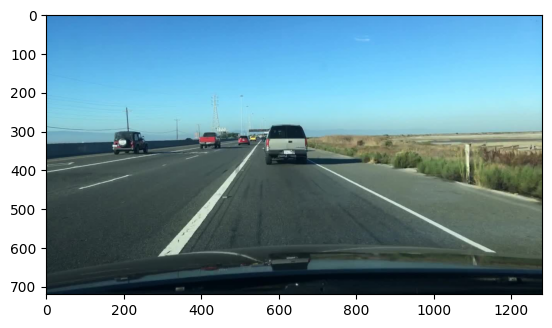

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('/home/tsou/Desktop/ICME2023/iVS-ODSEG-Dataset/images/0a0a0b1a-7c39d841.jpg')
print(img.shape)
plt.imshow(img)

(720, 1280, 3)
[0.01960784 0.01960784 0.01960784]
[0.01960784 0.01960784 0.01960784]


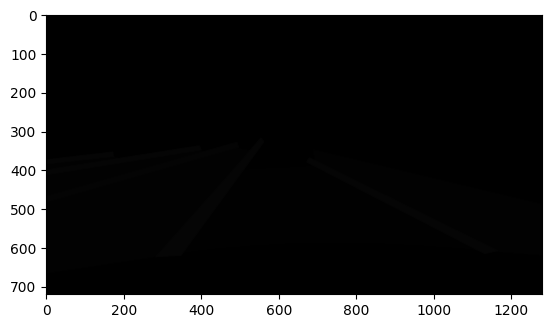

In [5]:
import matplotlib.pyplot as plt
img = plt.imread('/home/tsou/Desktop/ICME2023/iVS-ODSEG-Dataset/labels/class_labels/0a0a0b1a-7c39d841_lane_line_label_id.png')
print(img.shape)
print(img[380][0])
print(img[381][0])
plt.imshow(img)

## train new model

In [6]:
load = MyKeras.ask_load(build = True)

if load:
    model = models.build_model(image_shape)
    epoch = 0

Load last trained model? (y/n)
Building new model...


In [7]:
model = MyKeras.fit_model(model, train_gen, train_gen, initial_epoch=0,epochs=15,
                          train_steps=10, valid_steps=5,
                          model_save_dir='models/main', log_dir='logs/main')

/home/tsou/Desktop/ICME2023/MyKeras.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/15


2023-03-16 23:31:32.912664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-16 23:31:35.161192: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f94a40223a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-16 23:31:35.161239: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-03-16 23:31:35.171810: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-16 23:31:35.293538: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - ETA: 0s - loss: 2.0034 - acc: 0.2345 - mae: 0.2698 

## test

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]